In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy as sp
import sklearn
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans


In [181]:
data = pd.read_csv('genres_v2.csv')

/home/ghazal-da/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [182]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [183]:
print(data.shape)

(42305, 22)


In [184]:
data.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [185]:
data[['song_name']] = data[['song_name']].fillna(value="")
data[['duration_ms']] = data[['duration_ms']]/60000
data.rename(columns = {'duration_ms':'duration'}, inplace = True)
data=data.drop(columns=['type','id', 'Unnamed: 0', 'title', 'analysis_url', 'uri', 'track_href'])

In [186]:
data.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
time_signature      0
genre               0
song_name           0
dtype: int64

In [187]:
data.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,42305.0,0.639364,0.156617,0.065100,0.524000,0.64600,0.766000,0.988000
energy,42305.0,0.762516,0.183823,0.000243,0.632000,0.80300,0.923000,1.000000
key,42305.0,5.370240,3.666145,0.000000,1.000000,6.00000,9.000000,11.000000
loudness,42305.0,-6.465442,2.941165,-33.357000,-8.161000,-6.23400,-4.513000,3.148000
mode,42305.0,0.549462,0.497553,0.000000,0.000000,1.00000,1.000000,1.000000
speechiness,42305.0,0.136561,0.126168,0.022700,0.049100,0.07550,0.193000,0.946000
acousticness,42305.0,0.096160,0.170827,0.000001,0.001730,0.01640,0.107000,0.988000
instrumentalness,42305.0,0.283048,0.370791,0.000000,0.000000,0.00594,0.722000,0.989000
liveness,42305.0,0.214079,0.175576,0.010700,0.099600,0.13500,0.294000,0.988000
valence,42305.0,0.357101,0.233200,0.018700,0.161000,0.32200,0.522000,0.988000


In [188]:
data.nunique().sort_values()

mode                    2
time_signature          4
key                    12
genre                  15
danceability          890
energy                917
speechiness          1447
valence              1674
liveness             1695
acousticness         4602
instrumentalness     4757
loudness            11654
song_name           15440
tempo               15606
duration            26261
dtype: int64

In [189]:
#categorical values
data.describe(include="O")

,genre,song_name
count,42305,42305
unique,15,15440
top,Underground Rap,
freq,5875,20786


In [190]:
data['song_name'].value_counts()[:10]

           20786
Forever       14
Lost          12
Alone         11
Revenge       11
PTSD          11
Numb          11
Scars         11
Runaway       11
Hollow        11
Name: song_name, dtype: int64

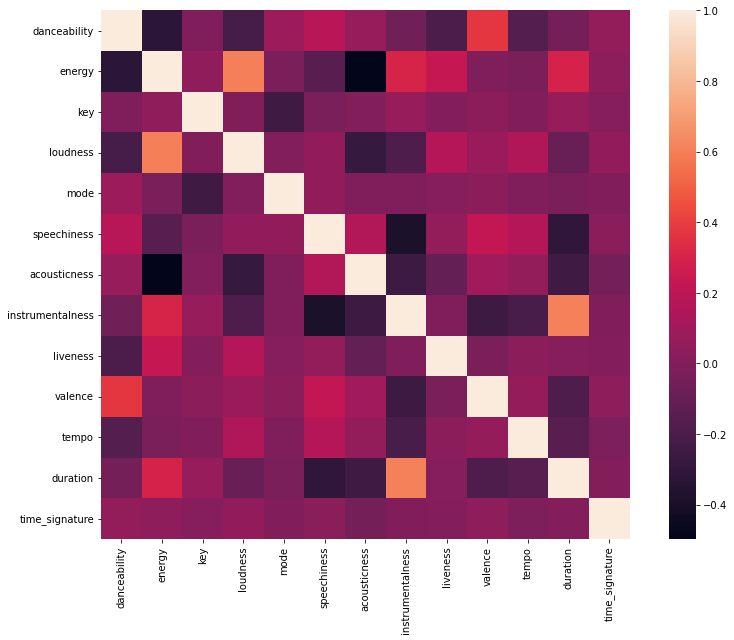

In [191]:
#correlation matrix
corr = data.corr()

f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

loudness-tempo\
loudness-energy

In [192]:
categorical_columns = data.select_dtypes('object').columns.to_list()

In [193]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data['genre_num'] = ordinal_encoder.fit_transform(data[['genre']])

In [194]:
ordinal_encoder.categories_[0]

array(['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance', 'trap'], dtype=object)

In [195]:
 data['genre_num'].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
42300    9
42301    9
42302    9
42303    9
42304    9
Name: genre_num, Length: 42305, dtype: int64

In [196]:
numerical_columns = data.select_dtypes('number').columns.to_list()

IndexError: index 12 is out of bounds for axis 0 with size 12

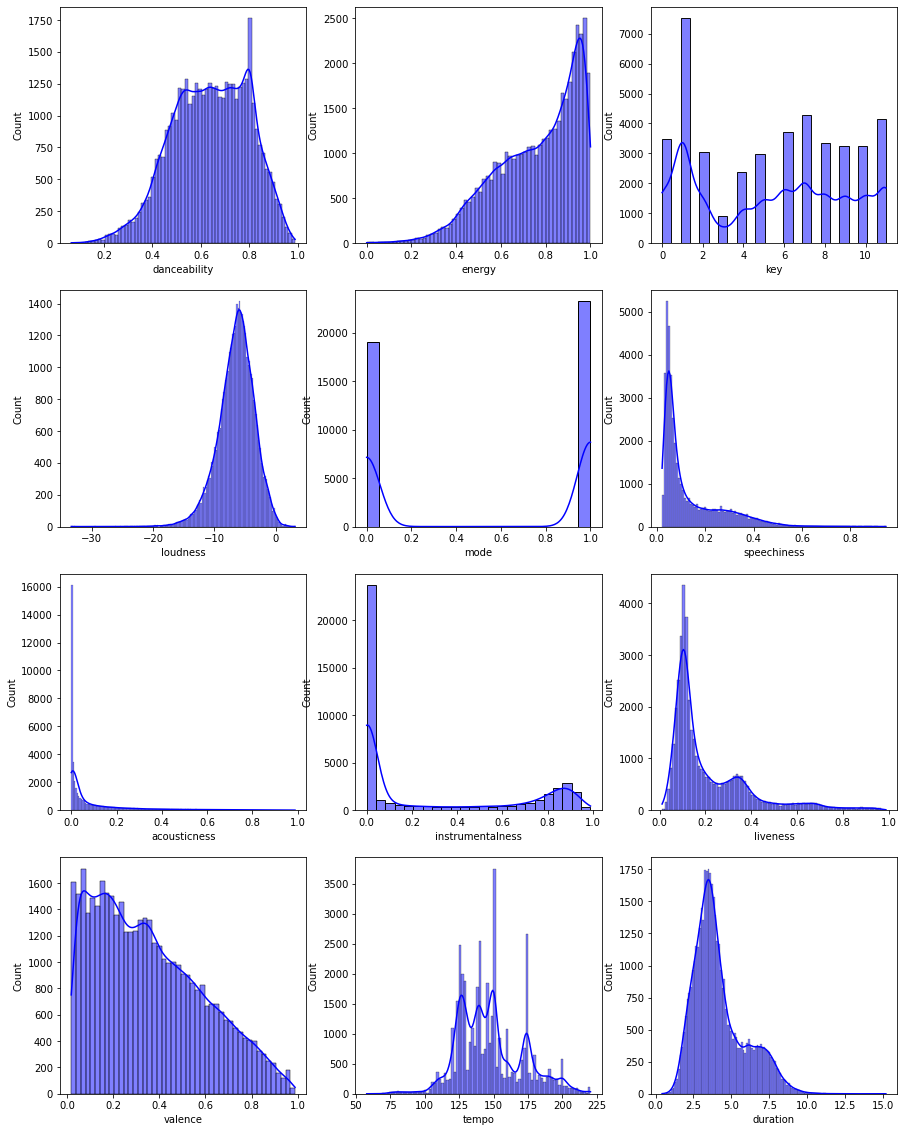

In [197]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs = np.ravel(axs)

for i, col in enumerate(numerical_columns):
    plt.sca(axs[i])
    sns.histplot(data=data, x=col, kde=True, fill=True, color='blue')

plt.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'genre_num'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

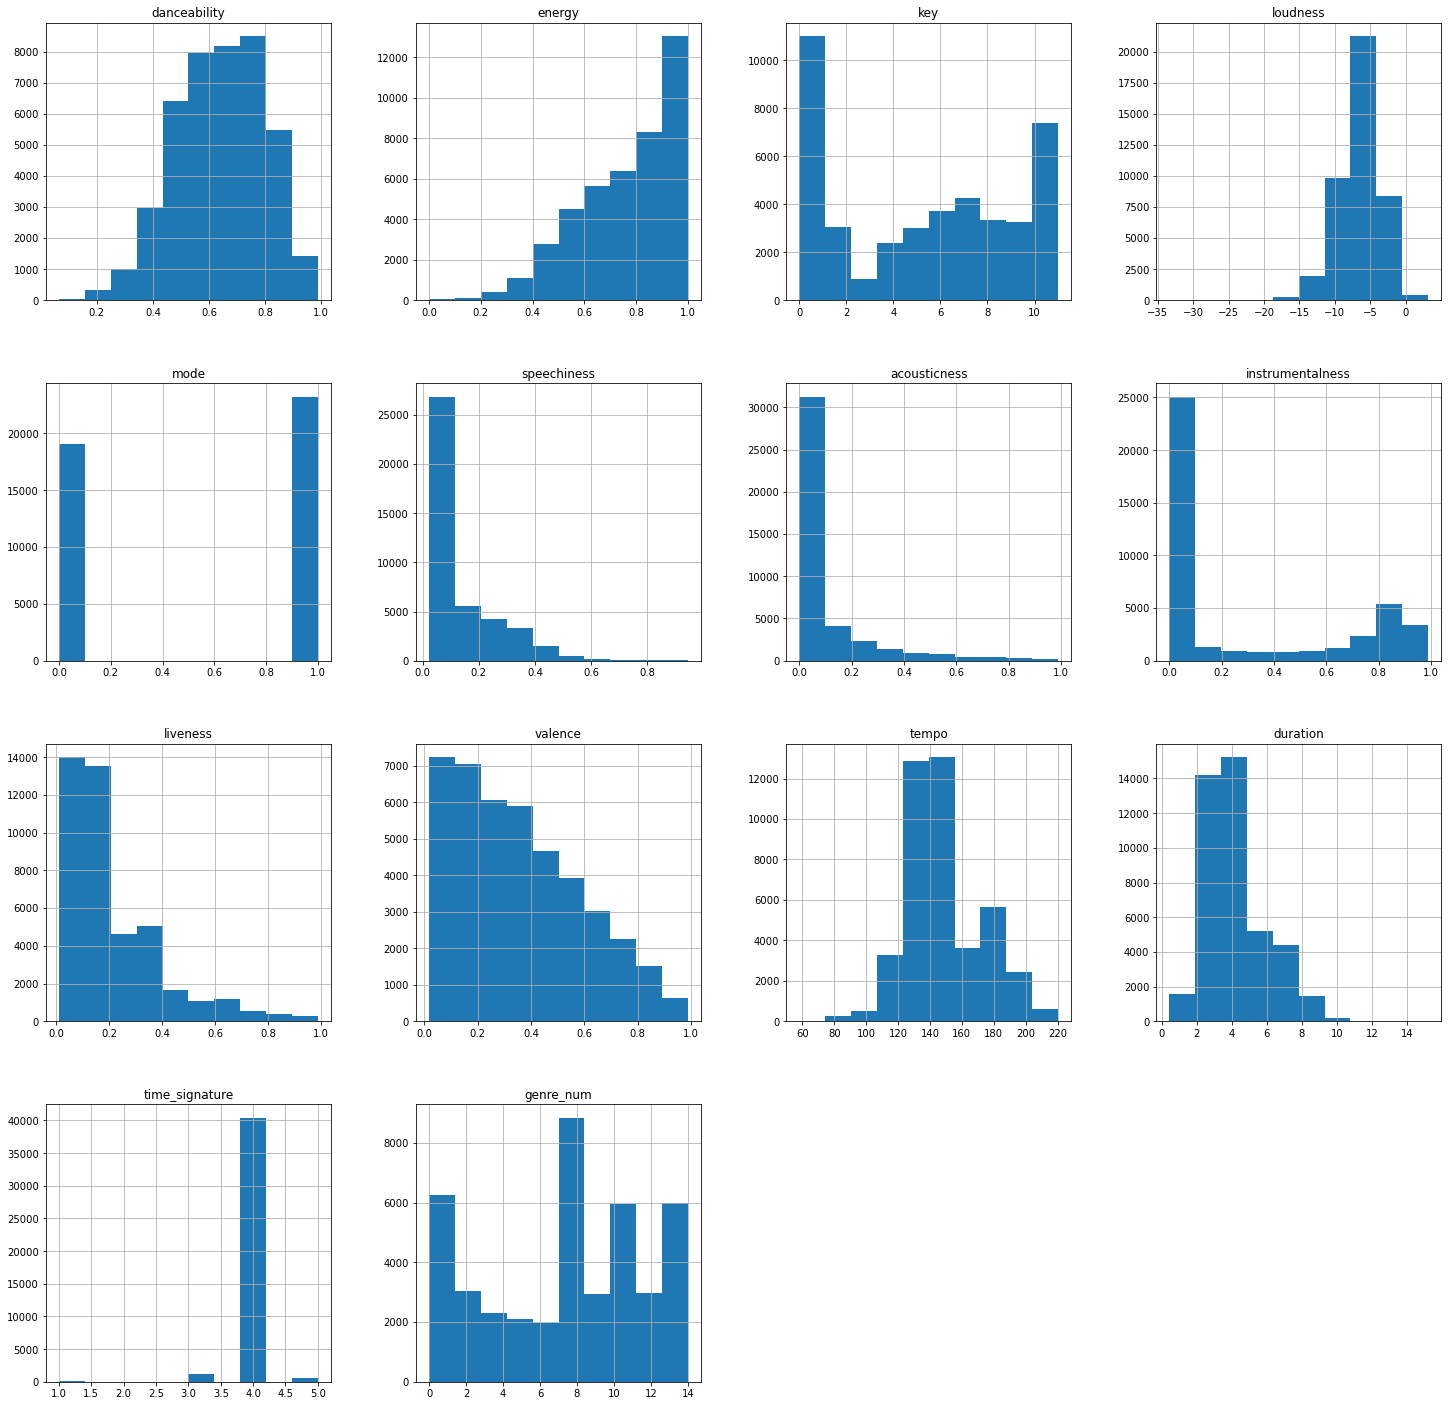

In [198]:
data.hist(figsize=(25,25))

Removing the ouliers of loudness more than 3 standard deviation 

In [199]:
from scipy.stats import zscore

z_scores = zscore(data["loudness"])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]

In [200]:
data.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,41982.0,0.639498,0.156408,0.065100,0.5240,0.646000,0.766750,0.988000
energy,41982.0,0.765710,0.180084,0.000243,0.6350,0.805000,0.923000,1.000000
key,41982.0,5.370564,3.666137,0.000000,1.0000,6.000000,9.000000,11.000000
loudness,41982.0,-6.383019,2.782248,-15.288000,-8.1090,-6.206000,-4.498000,2.185000
mode,41982.0,0.549474,0.497552,0.000000,0.0000,1.000000,1.000000,1.000000
speechiness,41982.0,0.136611,0.126138,0.022700,0.0492,0.075600,0.193000,0.946000
acousticness,41982.0,0.093738,0.166722,0.000001,0.0017,0.016100,0.104000,0.987000
instrumentalness,41982.0,0.281850,0.370150,0.000000,0.0000,0.005670,0.719000,0.989000
liveness,41982.0,0.214499,0.175824,0.010700,0.0996,0.135000,0.295000,0.988000
valence,41982.0,0.358146,0.233197,0.018700,0.1630,0.323000,0.523000,0.988000


In [201]:
X = pd.DataFrame(data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,15]].values)

In [202]:
cols= data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,15]].columns
X.columns = cols


Transformation

In [136]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson').fit(X)
X = pd.DataFrame(pt.transform(X), index=X.index, columns=X.columns)

Scaling so that data is between (0,1)

In [203]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [204]:
scaled = pd.DataFrame(scaler.fit_transform(X))
scaled.columns = cols

In [205]:
scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,genre_num
0,0.829884,0.813955,0.181818,0.453500,1.0,0.430304,0.060587,0.013549,0.045943,0.382028,0.610006,0.111487,0.75,0.000000
1,0.708527,0.492877,0.727273,0.461169,1.0,0.061410,0.406281,0.000000,0.109792,0.108635,0.351848,0.224043,0.75,0.000000
2,0.850471,0.892974,0.454545,0.601213,1.0,0.042890,0.013981,0.000004,0.369692,0.021046,0.986200,0.082507,0.75,0.000000
3,0.445227,0.780947,0.000000,0.605391,1.0,0.086971,0.024011,0.000000,0.105699,0.161250,0.794595,0.110497,0.50,0.000000
4,0.794127,0.623909,0.181818,0.436101,1.0,0.292754,0.219857,0.000000,0.158907,0.590426,0.554579,0.110088,0.75,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41977,0.501571,0.692925,0.363636,0.580324,1.0,0.008340,0.031914,0.000349,0.112862,0.387187,0.567055,0.274503,0.75,0.642857
41978,0.489652,0.767944,0.000000,0.421565,0.0,0.027293,0.022795,0.000018,0.198813,0.375838,0.566531,0.207912,0.75,0.642857
41979,0.320620,0.820956,0.727273,0.697419,1.0,0.030109,0.026341,0.000245,0.382994,0.108635,0.597377,0.235757,0.75,0.642857
41980,0.446311,0.920981,0.545455,0.601557,0.0,0.017871,0.000557,0.029929,0.047887,0.484164,0.567233,0.335342,0.75,0.642857


Finding the number of clusters by elbow method

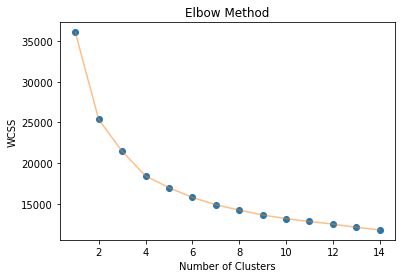

In [206]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_) 
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [207]:
wcss

[36070.69215224901,
 25373.445599553263,
 21471.742578419366,
 18447.912541128742,
 17009.99257564352,
 15813.70272810937,
 14914.789625096411,
 14261.788875338618,
 13652.91762814301,
 13208.832270856572,
 12856.67648490541,
 12539.115516697337,
 12142.946790966942,
 11823.694201995633]

In [208]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

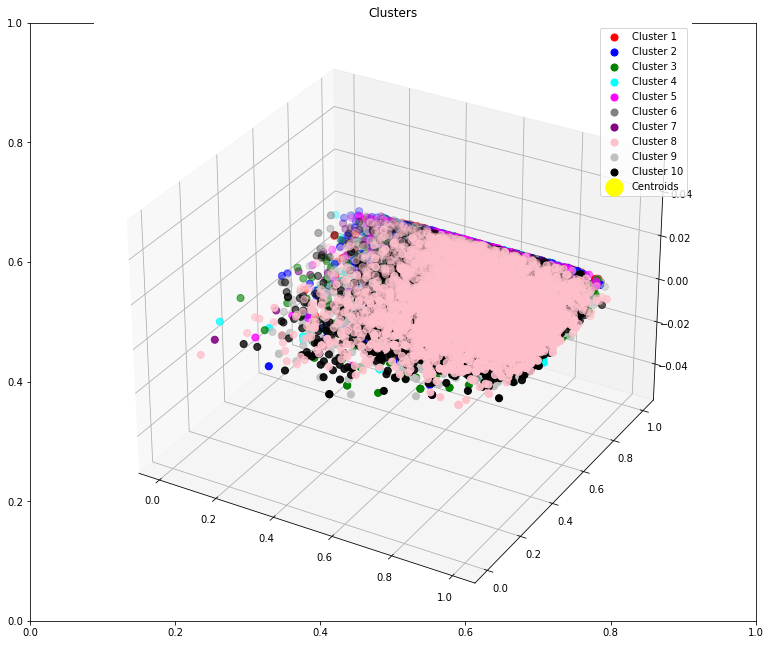

In [209]:
from mpl_toolkits.mplot3d import Axes3D
import itertools

colors = itertools.cycle(["r", "b", "g"])
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
scaled=scaled.values
plt.scatter(scaled[y_kmeans == 0,0], scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(scaled[y_kmeans == 6,0], scaled[y_kmeans == 6,1], s= 50, c= 'purple', label= 'Cluster 7')
plt.scatter(scaled[y_kmeans == 7,0], scaled[y_kmeans == 7,1], s= 50, c= 'pink', label= 'Cluster 8')
plt.scatter(scaled[y_kmeans == 8,0], scaled[y_kmeans == 8,1], s= 50, c= 'silver', label= 'Cluster 9')
plt.scatter(scaled[y_kmeans == 9,0], scaled[y_kmeans == 9,1], s= 50, c= 'black', label= 'Cluster 10')
# plt.scatter(scaled[y_kmeans == 10,0],scaled[y_kmeans ==10,1], s= 50, c= 'orange', label= 'Cluster 11')
# plt.scatter(scaled[y_kmeans == 8,0], scaled[y_kmeans == 8,1], s= 50, c= next(colors), label= 'Cluster 12')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [210]:
y_kmeans

array([9, 7, 7, ..., 0, 5, 0], dtype=int32)

In [211]:
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']


print(kmeans.shape)
kmeans.head()

(41982, 1)


,k_cluster
0,9
1,7
2,7
3,9
4,9


In [212]:
clustered_data = pd.concat([data, kmeans], axis=1)

print(clustered_data.shape)
clustered_data.head()

(42305, 17)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,genre,song_name,genre_num,k_cluster
0,0.831,0.814,2.0,-7.364,1.0,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2.075650,4.0,Dark Trap,Mercury: Retrograde,0.0,5.0
1,0.719,0.493,8.0,-7.230,1.0,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,3.740450,4.0,Dark Trap,Pathology,0.0,5.0
2,0.850,0.893,5.0,-4.783,1.0,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,1.647017,4.0,Dark Trap,Symbiote,0.0,2.0
3,0.476,0.781,0.0,-4.710,1.0,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,2.061017,3.0,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),0.0,4.0
4,0.798,0.624,2.0,-7.668,1.0,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,2.054967,4.0,Dark Trap,Venom,0.0,5.0


In [213]:
clustered_data['k_cluster'].value_counts()

9.0    6217
7.0    5777
2.0    4386
5.0    4357
3.0    4111
8.0    3904
0.0    3674
4.0    3289
1.0    3176
6.0    3091
Name: k_cluster, dtype: int64

printing the recommended lists

In [214]:
temp = clustered_data.loc[clustered_data['k_cluster'] == 1][:5]
list1 = pd.DataFrame(temp)
list1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,genre,song_name,genre_num,k_cluster
33,0.455,0.525,5.0,-12.692,0.0,0.0455,0.13600,0.734000,0.1250,0.2790,119.999,2.666233,4.0,Dark Trap,OhNo!,0.0,1.0
97,0.713,0.839,4.0,-6.377,0.0,0.3490,0.00417,0.706000,0.1060,0.0369,150.004,2.487167,4.0,Dark Trap,As Above so Look out Below,0.0,1.0
849,0.818,0.660,8.0,-7.427,1.0,0.0759,0.48400,0.000077,0.6910,0.1440,200.024,2.056267,4.0,Dark Trap,To Have And Have Not,0.0,1.0
1354,0.769,0.156,11.0,-10.700,0.0,0.0350,0.58500,0.015000,0.1020,0.5270,211.900,2.412217,4.0,Dark Trap,Depression & Obsession,0.0,1.0
2029,0.699,0.841,9.0,-4.891,1.0,0.1660,0.59800,0.008300,0.0858,0.7840,170.946,2.596450,4.0,Dark Trap,Legendary Member,0.0,1.0


In [215]:
temp = clustered_data.loc[clustered_data['k_cluster'] ==9][:5]
list2 = pd.DataFrame(temp)
list2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,genre,song_name,genre_num,k_cluster
0,0.831,0.814,2.0,-7.364,1.0,0.420,0.0598,0.0134,0.0556,0.389,156.985,2.075650,4.0,Dark Trap,Mercury: Retrograde,0.0,9.0
3,0.476,0.781,0.0,-4.710,1.0,0.103,0.0237,0.0000,0.1140,0.175,186.948,2.061017,3.0,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),0.0,9.0
4,0.798,0.624,2.0,-7.668,1.0,0.293,0.2170,0.0000,0.1660,0.591,147.988,2.054967,4.0,Dark Trap,Venom,0.0,9.0
5,0.721,0.568,0.0,-11.295,1.0,0.414,0.0452,0.2120,0.1280,0.109,144.915,1.875183,4.0,Dark Trap,Gatteka,0.0,9.0
8,0.774,0.751,1.0,-2.445,1.0,0.198,0.0614,0.0000,0.0728,0.189,219.960,2.338767,4.0,Dark Trap,I Put My Dick in Your Mental,0.0,9.0


In [216]:
temp = clustered_data.loc[clustered_data['k_cluster'] ==7][:5]
list3 = pd.DataFrame(temp)
list3

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,genre,song_name,genre_num,k_cluster
1,0.719,0.493,8.0,-7.230,1.0,0.0794,0.4010,0.000000,0.118,0.1240,115.080,3.740450,4.0,Dark Trap,Pathology,0.0,7.0
2,0.850,0.893,5.0,-4.783,1.0,0.0623,0.0138,0.000004,0.372,0.0391,218.050,1.647017,4.0,Dark Trap,Symbiote,0.0,7.0
6,0.718,0.668,8.0,-4.162,1.0,0.1370,0.0254,0.007800,0.124,0.0380,130.826,1.293067,4.0,Dark Trap,kamikaze (+ pulse),0.0,7.0
7,0.694,0.711,8.0,-5.525,1.0,0.2210,0.0397,0.000000,0.112,0.2830,138.049,2.125400,3.0,Dark Trap,T.R.U. (Totally Rotten Underground),0.0,7.0
9,0.893,0.907,11.0,-10.406,1.0,0.3670,0.1520,0.031100,0.558,0.3020,199.942,2.032983,4.0,Dark Trap,Andromeda,0.0,7.0


In [217]:
temp = clustered_data.loc[clustered_data['k_cluster'] == 5][:5]
list4 = pd.DataFrame(temp)
list4

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,genre,song_name,genre_num,k_cluster
3721,0.442,0.814,5.0,-5.889,0.0,0.0343,0.215000,0.989,0.140,0.384,199.878,3.320000,4.0,Dark Trap,All Wet,0.0,5.0
4497,0.609,0.691,1.0,-9.144,0.0,0.0328,0.045700,0.372,0.141,0.146,110.992,4.126667,4.0,Dark Trap,Galaxy,0.0,5.0
4547,0.654,0.491,11.0,-8.559,1.0,0.0398,0.000626,0.782,0.280,0.175,145.019,3.477600,4.0,Dark Trap,immortal,0.0,5.0
4694,0.677,0.962,7.0,-0.814,1.0,0.2840,0.110000,0.325,0.496,0.509,190.050,2.383333,4.0,Underground Rap,Rigor Mortis,7.0,5.0
4847,0.538,0.655,11.0,-9.339,0.0,0.2420,0.249000,0.131,0.102,0.250,165.902,1.783133,4.0,Underground Rap,Badlands,7.0,5.0


In [218]:
temp = clustered_data.loc[clustered_data['k_cluster'] == 3][:5]
list5 = pd.DataFrame(temp)
list5

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,genre,song_name,genre_num,k_cluster
77,0.810,0.524,5.0,-6.705,1.0,0.0441,0.04440,0.7140,0.1050,0.1550,122.016,1.970600,4.0,Dark Trap,A Death In The Ocean Would Be Beautiful,0.0,3.0
89,0.860,0.524,11.0,-4.698,1.0,0.0729,0.57800,0.9600,0.0993,0.1420,114.946,2.482317,4.0,Dark Trap,Caligula,0.0,3.0
204,0.136,0.821,3.0,-5.454,1.0,0.1600,0.09650,0.0291,0.3250,0.0362,192.940,1.699717,3.0,Dark Trap,Intro.Desolation,0.0,3.0
629,0.864,0.729,2.0,-4.621,1.0,0.2750,0.00908,0.0000,0.1050,0.2850,203.982,2.067217,4.0,Dark Trap,Case 19 (feat. 6ix9ine),0.0,3.0
665,0.753,0.440,9.0,-11.133,1.0,0.0361,0.54600,0.0936,0.1290,0.5400,160.006,2.595317,4.0,Dark Trap,Yellow Pills,0.0,3.0
